# Example of overfitting

If we do not have enough data then a more complex model will overift. Try changing the number_of_samples to 100 and see that we get something closer to a straightline. 

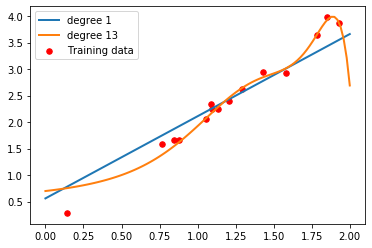

In [11]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

number_of_samples = 15
np.random.seed(0)
x = np.random.uniform(0, 2, number_of_samples)
y = (2+np.random.normal(0,0.1,number_of_samples))*x  #+  np.random.normal(0, 0.5, number_of_samples)
#x_plot = np.linspace(np.min(x),np.max(x),100)
x_plot = np.linspace(0,2,100)
y_true = (2+np.random.normal(0,0.1,len(x_plot)))*x_plot

x_plot = x_plot[:,np.newaxis]
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
lw = 2
plt.scatter(x, y,color='red', s=30, marker='o',label="Training data" )
#plt.plot(x_plot,y_true,linewidth=lw,color='green',label="Ground Truth")
for degree in [1,13]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x, y)
    y_plot=model.predict(x_plot)
    plt.plot(x_plot, y_plot, linewidth=lw,
           label="degree %d" % degree)

plt.legend(loc='upper left')
plt.savefig("overfitting.png")
plt.show()

# Code taken from https://scikit-learn.org/stable/

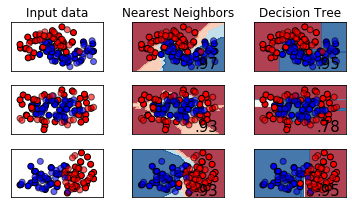

In [35]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Minor modification see  https://scikit-learn.org/stable/ for the original code.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         #"Linear SVM", 
         #"RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         #"Random Forest",
         #"Neural Net", 
         #"AdaBoost",
         #"Naive Bayes",
         #"QDA"
        ]

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
 ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(5, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.savefig("classification.png")
plt.show()

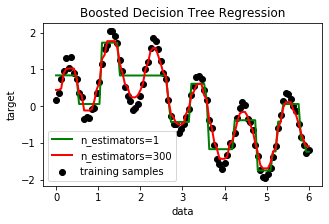

In [38]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.savefig("regression.png")
plt.show()

# An Elphant
"With four parameters I can fit an elephant, and with five I can
make him wiggle his trunk." Attributed to John von Neumann.


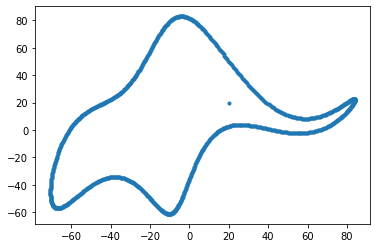

In [7]:
"""
Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)

Based on a paper by:
Drawing an elephant with four complex parameters
Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017
"""
import numpy as np
import pylab

# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
#pylab.figure(figsize=(1, 2))
pylab.plot(y,-x,'.')
pylab.savefig("elephant.png")
pylab.show()

# Very silly machine learning example

theta_0 =1.0 theta_1=3.0 rms =  33.53666666666666
theta_0 =1.5 theta_1=2.0 rms =  2.4283333333333332


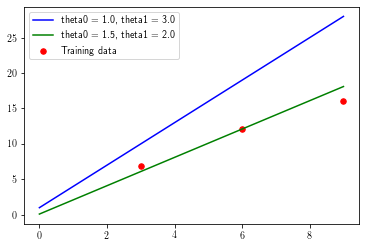

In [32]:
import matplotlib.pyplot as plt


import numpy as np

x_training  = [3,6,9]
y_training  = [6.9,12.1,16]
plt.scatter(x_training, y_training,color='red', s=30, marker='o',label="Training data" )

def h(theta0,theta1,x):
    return theta0 + theta1*x


def rms(theta0,theta1,x,y):
    error = 0.0
    for (xi,yi) in zip(x,y):
        error = error +  (h(theta0,theta1,xi) - yi)*(h(theta0,theta1,xi) - yi)
    return 0.5*(1/len(x))*error

print("theta_0 =1.0 theta_1=3.0 rms = ",rms(1.0,3.0,x_training,y_training))
print("theta_0 =1.5 theta_1=2.0 rms = ",rms(1.5,2.0,x_training,y_training))
x_plot = np.linspace(0,9,100)
y_plot_1 = 1.0 + 3.0*x_plot
y_plot_2 = 0.1 + 2.0*x_plot
plt.plot(x_plot,y_plot_1,color='blue',label='theta0 = 1.0, theta1 = 3.0')
plt.plot(x_plot,y_plot_2,color='green',label="theta0 = 1.5, theta1 = 2.0")

plt.legend(loc='upper left')
plt.savefig('silly.png')
plt.show()
